# How can the company improve collaboration?

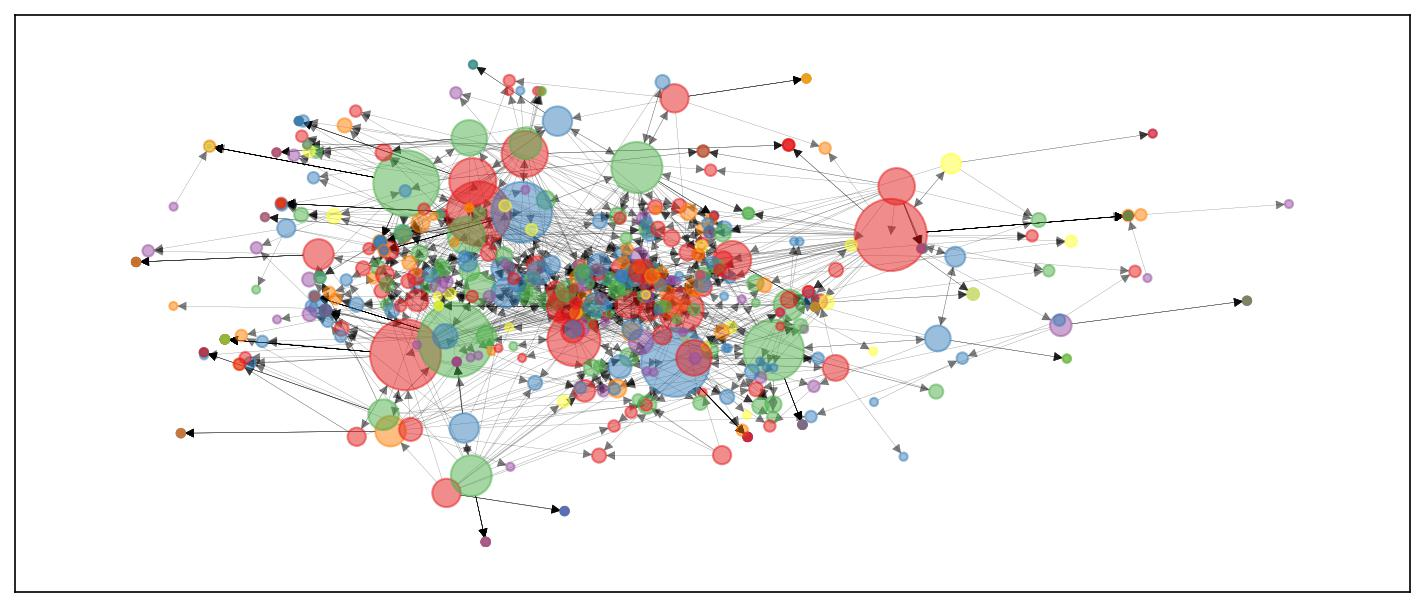

## 📖 Background
You work in the analytics department of a multinational company, and the head of HR wants your help mapping out the company's employee network using message data. 

They plan to use the network map to understand interdepartmental dynamics better and explore how the company shares information. The ultimate goal of this project is to think of ways to improve collaboration throughout the company. 

## 💪 Competition challenge

Create a report that covers the following:  
  1. Which departments are the most/least active?
  2. Which employee has the most connections? 
  3. Identify the most influential departments and employees.
  4. Using the network analysis, in which departments would you recommend the HR team focus to boost collaboration?

## 💾 The data

The company has six months of information on inter-employee communication. For privacy reasons, only sender, receiver, and message length information are available [(source)](https://snap.stanford.edu/data/CollegeMsg.html). 

#### Messages has information on the sender, receiver, and time.
- "sender" - represents the employee id of the employee sending the message.
- "receiver" - represents the employee id of the employee receiving the message.
- "timestamp" - the date of the message.
- "message_length" - the length in words of the message.

#### Employees has information on each employee;
- "id" - represents the employee id of the employee.
- "department" - is the department within the company. 
- "location" - is the country where the employee lives.
- "age" - is the age of the employee.

_**Acknowledgments:** Pietro Panzarasa, Tore Opsahl, and Kathleen M. Carley. "Patterns and dynamics of users' behavior and interaction: Network analysis of an online community." Journal of the American Society for Information Science and Technology 60.5 (2009): 911-932._

## 📚 Import libraries and dataframes

In [1]:
# Load standard libraries
import pandas as pd
import numpy as np

# Load visualization library
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

# Load network library
import networkx as nx

# Load DataFrames
employees = pd.read_csv('data/employees.csv')
messages = pd.read_csv('data/messages.csv', parse_dates=['timestamp'])

## 👨‍🔬 Exploratory analysis

### employees dataframe

In [2]:
employees.tail()

,id,department,location,age
659,1830,Admin,UK,42
660,1839,Admin,France,28
661,1879,Engineering,US,40
662,1881,Sales,Germany,57
663,1890,Admin,US,39


The dataframe has 664 rows and 4 columns.

In [3]:
employees.shape

(664, 4)

There are not null values in the dataframe.

In [4]:
employees.isnull().sum()

id            0
department    0
location      0
age           0
dtype: int64

- There are 6 departments in the company's employee network.
    - The sales department has the most employees with 161 employees.
    - The marketing department has the least employees with only 52 employees.

In [5]:
employees.value_counts(subset='department')

department
Sales          161
Admin          140
Operations     134
Engineering    100
IT              77
Marketing       52
dtype: int64

- The company has employees working in 5 countries.
    - The country with the most employees is the US.
    - The country with the least employees is Brasil.

In [6]:
employees.value_counts(subset='location')

location
US         277
France     157
Germany     99
UK          70
Brasil      61
dtype: int64

- The employees' age are between 22 and 59 years old.
    - Most employees are between 35 and 40 years old.

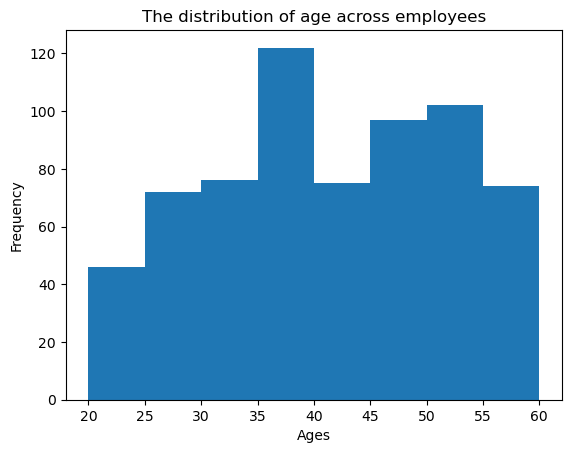

In [7]:
ax = plt.hist(employees['age'], histtype='bar', bins=[20, 25, 30, 35, 40, 45, 50, 55, 60])
plt.title('The distribution of age across employees')
plt.xlabel('Ages')
plt.ylabel('Frequency')
plt.show()

### messages dataframe

In [8]:
messages.tail()

,sender,receiver,timestamp,message_length
3507,469,1629,2021-11-24 05:04:57,75
3508,1487,1543,2021-11-26 00:39:43,25
3509,144,1713,2021-11-28 18:30:47,51
3510,1879,1520,2021-11-29 07:27:52,58
3511,1879,1543,2021-11-29 07:37:49,56


The dataframe has 3512 rows and 4 columns.

In [9]:
messages.shape

(3512, 4)

There are not null values in the dataframe.

In [10]:
messages.isnull().sum()

sender            0
receiver          0
timestamp         0
message_length    0
dtype: int64

To analyze the "timestamp" column, the "month", "day" and 'day_week' columns are created.

In [11]:
messages = messages.assign(
    month = lambda x: x['timestamp'].dt.month,
    day = lambda x: x['timestamp'].dt.day,
    day_week = lambda x: x['timestamp'].dt.weekday
)

- The messages are from June to November.
    - The month with the most messages is June, follow by July.
    - The month with the least messages is November.

In [12]:
messages.value_counts(subset='month').sort_index()

month
6     1933
7     1218
8       88
9      107
10      90
11      76
dtype: int64

- The messages between employees are the 7 days of the week.
    - The day with the most messages is Tuesday, follow by Monday.
    - The day with the least messages is Friday.

In [13]:
messages.value_counts(subset='day_week').sort_index() # Monday=0, Sunday=6

day_week
0    661
1    683
2    732
3    467
4    281
5    251
6    437
dtype: int64

- The plot shows the number of messages over time
    - The day with the most messages is Tuesday, July 7, 2021.

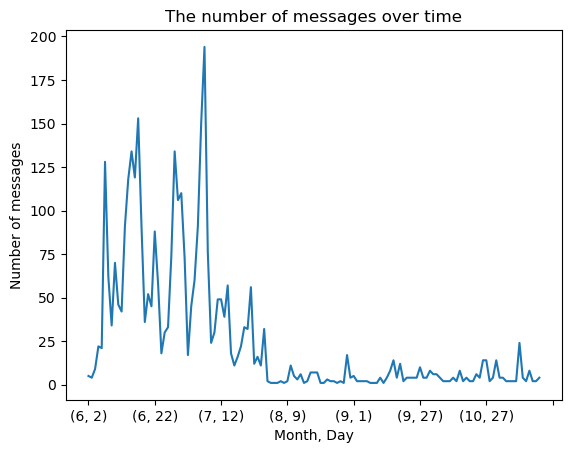

In [14]:
messages_month_day = messages.groupby(['month', 'day'])['timestamp'].count()
messages_month_day.plot(title='The number of messages over time', xlabel='Month, Day', ylabel='Number of messages')
plt.show()

## 🕸 The company's employee network

First, let's create the network.
- We have a sender and a receiver in the messages DataFrame. It means we need to create a directed graph (D).
- The edges are created with the information in the messages DataFrame.
    - The "timestamp", "message_length", "month", "day" and "day_week" columns are considered as atributes of the edges.
- The "department", "location" and "age" columns in the employees DataFrame are considered as atributes of the nodes.

In [15]:
D = nx.from_pandas_edgelist(messages,
                           source='sender',
                           target='receiver',
                           edge_attr=True,
                           create_using=nx.DiGraph())

In [16]:
for n, dep, loc, age in employees.values:
    D.nodes[n]['department'] = dep 
    D.nodes[n]['location'] = loc
    D.nodes[n]['age'] = age

The total **number of nodes** in the network is **664**, and the total **number of edges** is **1,141**.

In [17]:
print(f"Nodes: {D.number_of_nodes()}")
print(f"Egdes: {D.number_of_edges()}")

Nodes: 664
Egdes: 1141


The data from the last edge and last node shows that all the data was imported correctly.

In [18]:
list(D.edges(data=True))[-1]

(1879,
 1543,
 {'timestamp': Timestamp('2021-11-29 07:37:49'),
  'message_length': 56,
  'month': 11,
  'day': 29,
  'day_week': 0})

In [19]:
list(D.nodes(data=True))[-1]

(1879, {'department': 'Engineering', 'location': 'US', 'age': 40})

The next figure show the graphical representation of the company's employee network.

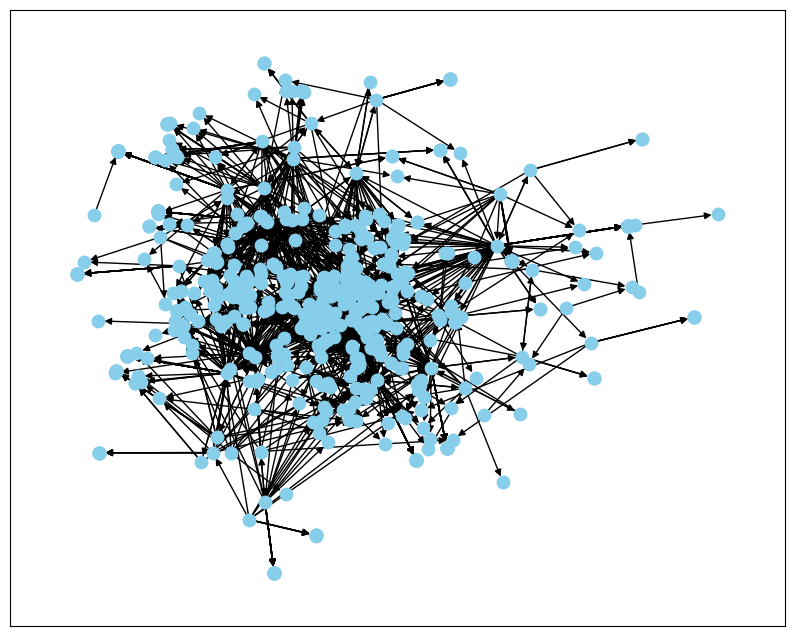

In [20]:
plt.figure(figsize=(10, 8))
pos = nx.kamada_kawai_layout(D)
nx.draw_networkx(D, with_labels=False, node_size=80, pos=pos, node_color='skyblue')

- The employees' network is not connected, nor strongly (there are not directed paths between every pair of nodes) nor weakly (there are not paths between every pair of nodes, regarless of direction).
    - This means that **the network is not a completed network** (a network in which all possible pair of nodes are connected by links).

In [21]:
nx.is_strongly_connected(D)

False

In [22]:
nx.is_weakly_connected(D)

False

- Another way to check if the network is completed, is by looking at the density of the network (if the employees' network is a complete network, it should have a density of one).
    - The density of the employees' network is 0.003.
    - We're are dealing with a network that is sparse (most pair of nodes are not directly connected to each other). 

In [23]:
nx.density(D)

0.0025918152246997036

Actually, the company's employee network is divided in 7 connected components.

In [24]:
len(list(nx.weakly_connected_components(D)))

7

### The peripheral networks

- The components with the shortest connected components are considered as peripheral networks for now on.
    - A subnetwork is created. It is called **peripheral_networks**.
    - There are 6 components in the peripheral networks.
- The figure shows the peripheral networks:
    - 4 of 6 connected components have only two nodes.
    - 2 of 6 connected components have only three nodes.

In [25]:
# The shortest connected components
shortest_components = list(nx.weakly_connected_components(D))[1:]

# List of nodes from the shortest connected components
peripheral_nodes = []
for value in shortest_components:
    for node in value:
        peripheral_nodes.append(node)

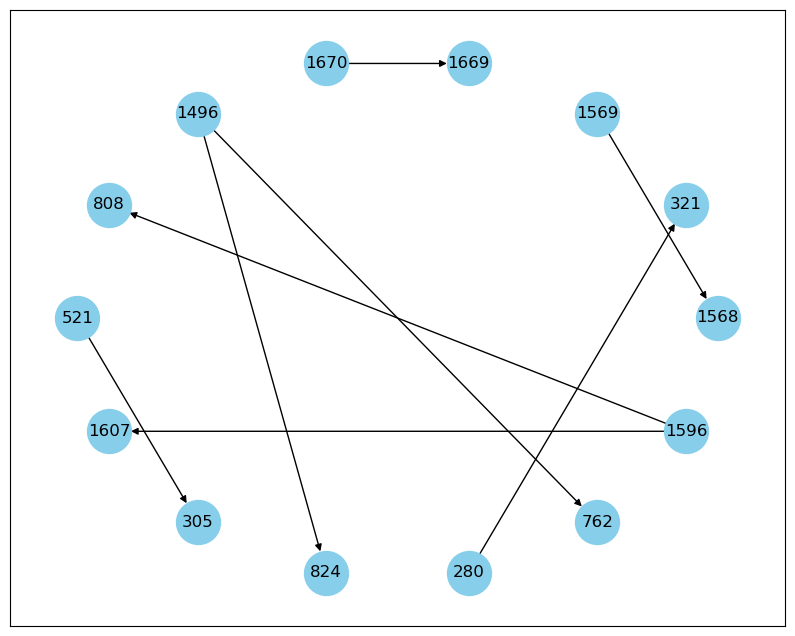

In [26]:
# subnetwork with all the shortest connected components
peripheral_networks = D.subgraph(peripheral_nodes)

plt.figure(figsize=(10, 8))
pos=nx.circular_layout(peripheral_networks)
nx.draw_networkx(peripheral_networks, node_size=1000, node_color='skyblue', pos=pos)

### The core network

- The component with the largest connected component is considered as the **core network**.

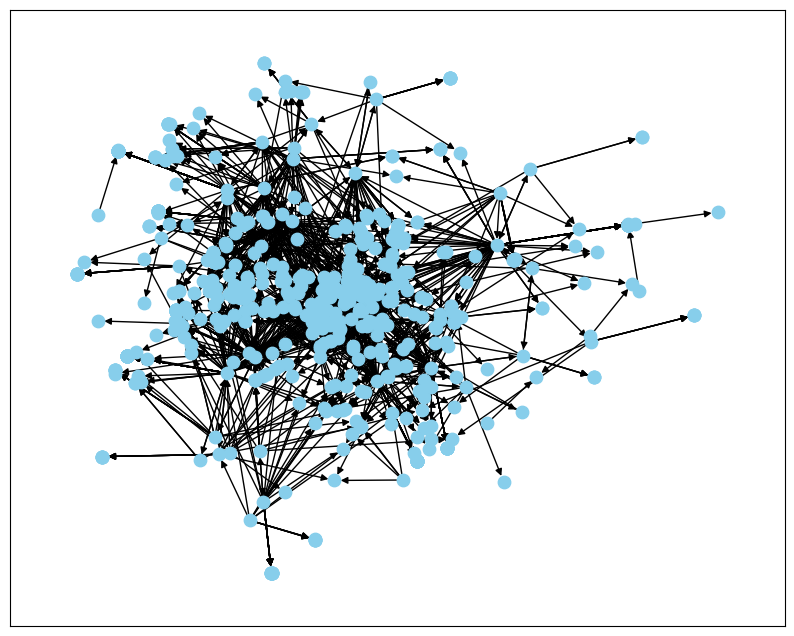

In [27]:
# subnetwork with all the largest connected components
core_nodes = max(nx.weakly_connected_components(D), key=len)
core_network = D.subgraph(core_nodes)

plt.figure(figsize=(10, 8))
pos = nx.kamada_kawai_layout(core_network)
nx.draw_networkx(core_network, with_labels=False, node_size=80, pos=pos, node_color='skyblue')

Finally, the core network is weakly connected.

In [28]:
nx.is_weakly_connected(core_network)

True

## 1. Which departments are the most/least active?

- To know which department is the most and least active, we can use a centrality measure (it measures the importance of a node or a link).
    - Specifically, we need to used the degree centrality (it counts the number of neighbors of a node).
    - In directed network, each node has an in-degree (number of incoming links) and an out-degree (number of outgoing links).
- First, we are summing the in-degree and out-degree for each node in the core network.
    - The total sum is 2,266.

In [29]:
degrees = list(core_network.degree)

total_degrees = 0
for node, degree in degrees:
    total_degrees = total_degrees + degree

print(total_degrees)

2266


Now, we need to know which nodes are from the sales department, admin deparment, and so on.

In [30]:
nodes_sales=[]
nodes_admin=[]
nodes_operations=[]
nodes_engineering=[]
nodes_it=[]
nodes_marketing=[]

for node in core_network.nodes:
    if core_network.nodes[node]['department'] == 'Sales':
        nodes_sales.append(node)
    elif core_network.nodes[node]['department'] == 'Admin':
        nodes_admin.append(node)
    elif core_network.nodes[node]['department'] == 'Operations':
        nodes_operations.append(node)
    elif core_network.nodes[node]['department'] == 'Engineering':
        nodes_engineering.append(node)
    elif core_network.nodes[node]['department'] == 'IT':
        nodes_it.append(node)
    elif core_network.nodes[node]['department'] == 'Marketing':
        nodes_marketing.append(node)

The next step is to sum the total degrees for each department in the core network.

In [31]:
degree_sales = 0
for node in nodes_sales:
    degree_sales = degree_sales + core_network.degree(node)

degree_admin = 0
for node in nodes_admin:
    degree_admin = degree_admin + core_network.degree(node)

degree_operations = 0
for node in nodes_operations:
    degree_operations = degree_operations + core_network.degree(node)

degree_engineering = 0
for node in nodes_engineering:
    degree_engineering = degree_engineering + core_network.degree(node)

degree_it = 0
for node in nodes_it:
    degree_it = degree_it + core_network.degree(node)

degree_marketing = 0
for node in nodes_marketing:
    degree_marketing = degree_marketing + core_network.degree(node)

- Finally, we have the share of degrees for each depatment:
    - **The sales department is the most active department** in the company's employee network.
    - **The marketing department is the least active department** in the company's employee network.

In [32]:
print(f"The share of the sales department is: {round((degree_sales/total_degrees)*100)}%")
print(f"The share of the admin department is: {round((degree_admin/total_degrees)*100)}%")
print(f"The share of the operations department is: {round((degree_operations/total_degrees)*100)}%")
print(f"The share of the engineering department is: {round((degree_engineering/total_degrees)*100)}%")
print(f"The share of the it department is: {round((degree_it/total_degrees)*100)}%")
print(f"The share of the marketing department is: {round((degree_marketing/total_degrees)*100)}%")

The share of the sales department is: 35%
The share of the admin department is: 20%
The share of the operations department is: 28%
The share of the engineering department is: 7%
The share of the it department is: 7%
The share of the marketing department is: 3%


## 2. Which employee has the most connections?

- **The employee 598 has the most connections** in the company's employee network with **84 connections**.
    - 7 in-degree connections.
    - 77 out-degree connections.

In [33]:
highest_degree_node = max(D.nodes, key=D.degree)
degree = D.degree(highest_degree_node)
print(f"The node with the highest degree is node {highest_degree_node}, and its degree is {degree}")

The node with the highest degree is node 598, and its degree is 84


In [34]:
core_network.in_degree(highest_degree_node)

7

In [35]:
core_network.out_degree(highest_degree_node)

77

## 3. Identify the most influential departments and employees.

- To know the most influential departments and employees, we can use the betweenness centrality measure (it measures the number of times a node lies on the shortest path between other nodes).
    - The higher the count, the more traffic is controlled by the node, which is therefore more influential in the network.

### Most influential departments

To know which departments are the most influential, the total sum of the betweenness measure for each department is calculated.

In [36]:
betweenness_sales = 0
for node in nodes_sales:
    betweenness_sales = betweenness_sales + nx.betweenness_centrality(D)[node]
    
betweenness_admin = 0
for node in nodes_admin:
    betweenness_admin = betweenness_admin + nx.betweenness_centrality(D)[node]

betweenness_operations = 0
for node in nodes_operations:
    betweenness_operations = betweenness_operations + nx.betweenness_centrality(D)[node]

betweenness_engineering = 0
for node in nodes_engineering:
    betweenness_engineering = betweenness_engineering + nx.betweenness_centrality(D)[node]

betweenness_it = 0
for node in nodes_it:
    betweenness_it = betweenness_it + nx.betweenness_centrality(D)[node]

betweenness_marketing = 0
for node in nodes_marketing:
    betweenness_marketing = betweenness_marketing + nx.betweenness_centrality(D)[node]

The most influential departments are the **sales department**, the **admin department** and the **operations department**.

In [37]:
print('\033[1m' f"The betweenness centrality of the sales department is: {round(betweenness_sales, 4)}" '\033[0m')
print('\033[1m' f"The betweenness centrality of the admin department is: {round(betweenness_admin, 4)}" '\033[0m')
print('\033[1m' f"The betweenness centrality of the operations department is: {round(betweenness_operations, 4)}" '\033[0m')
print(f"The betweenness centrality of the engineering department is: {round(betweenness_engineering, 4)}")
print(f"The betweenness centrality of the it department is: {round(betweenness_it, 4)}")
print(f"The betweenness centrality of the marketing department is: {round(betweenness_marketing, 4)}")

The betweenness centrality of the sales department is: 0.0332
The betweenness centrality of the admin department is: 0.029
The betweenness centrality of the operations department is: 0.0332
The betweenness centrality of the engineering department is: 0.0004
The betweenness centrality of the it department is: 0.0016
The betweenness centrality of the marketing department is: 0.0003


### Most influential employees

The **top 5 most influential employees** in the company's employee network are:
1. **Employee id 509**: 
    - Department: Admin.
    - Location: US.
2. **Employee id 337**:
    - Department: Sales.
    - Location: US.
3. **Employee id 598**:
    - Department: Operations.
    - Location: US.
4. **Employee id 128**:
    - Department: Sales.
    - Location: France.
5. **Employee id 260**:
    - Department: Operations.
    - Location: US.

In [38]:
betweenness_centrality = nx.betweenness_centrality(core_network)

In [39]:
betweenness_centrality_df = pd.DataFrame.from_dict(betweenness_centrality, orient='index', columns=['centrality'])

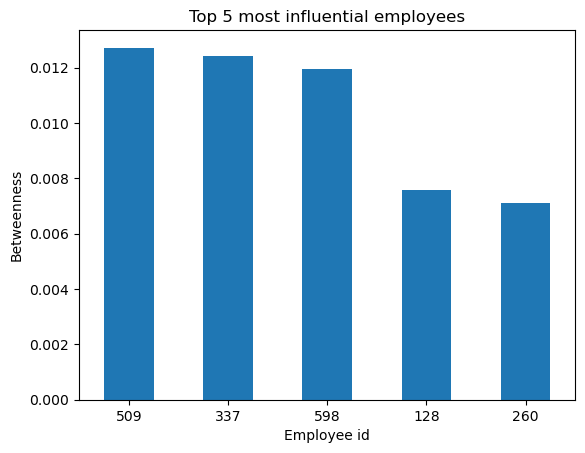

In [40]:
betweenness_centrality_df.sort_values('centrality', ascending=False)[:5].plot(kind='bar', legend=False)
plt.title('Top 5 most influential employees')
plt.xlabel('Employee id')
plt.ylabel('Betweenness')
plt.xticks(rotation=0)
plt.show()

In [41]:
for node, atrribute in list(core_network.nodes(data=True)):
    if node in [509, 337, 598, 128, 260]:
        print(node, atrribute)

260 {'department': 'Operations', 'location': 'US', 'age': 48}
128 {'department': 'Sales', 'location': 'France', 'age': 47}
337 {'department': 'Sales', 'location': 'US', 'age': 37}
509 {'department': 'Admin', 'location': 'US', 'age': 39}
598 {'department': 'Operations', 'location': 'US', 'age': 38}


## 4. Using the network analysis, in which departments would you recommend the HR team focus to boost collaboration?

- The figure shows the most influential nodes by department:
    - The sales, admin and operations departments are the most influential departments.

In [42]:
department_color = {
    'Sales': '#e41a1c',
    'Admin': '#377eb8',
    'Operations': '#4daf4a',
    'Engineering': '#984ea3',
    'IT': '#ff7f00',
    'Marketing': '#ffff33'
}

node_colors_department = [department_color[core_network.nodes[n]['department']] for n in core_network.nodes]

In [43]:
node_size_betweenness = [v * 100000 for v in betweenness_centrality.values()]

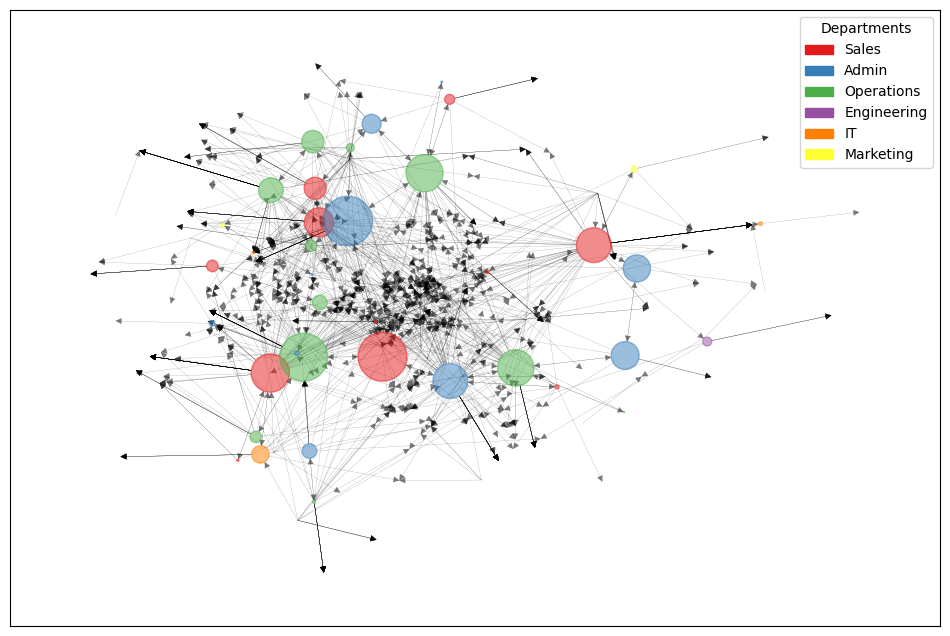

In [44]:
# creating artists specifically for adding to the legend
sales_patch = mpatches.Patch(color='#e41a1c', label='Sales')
admin_patch = mpatches.Patch(color='#377eb8', label='Admin')
operations_patch = mpatches.Patch(color='#4daf4a', label='Operations')
engineering_patch = mpatches.Patch(color='#984ea3', label='Engineering')
it_patch = mpatches.Patch(color='#ff7f00', label='IT')
marketing_patch = mpatches.Patch(color='#ffff33', label='Marketing')

plt.figure(figsize=(12,8))
pos = nx.kamada_kawai_layout(core_network)
nx.draw_networkx(core_network, pos=pos, node_color=node_colors_department, node_size=node_size_betweenness, 
                 with_labels=False, width=0.15, alpha=0.5)
plt.legend(handles=[sales_patch, admin_patch, operations_patch, engineering_patch, it_patch,
                   marketing_patch], title='Departments')
plt.show()

Therefore, I would recommend the HR team focus in the **sales, admin and operations departments to boost collaboration**.

## Summary

- **The sales department is the most active department** and **the marketing department is the least active department** in the company's employee network.
-  **The employee 598 has the most connections** in the company's employee network with **84 connections**.
- The most influential departments are the **sales department**, the **admin department** and the **operations department** in the company's employee network.
- The **top 5 most influential employees** in the company's employee network are:
	- **Employee id 509, 337, 598, 128, 260**.
    - Two of the most influential employees are from the Sales department, two are from the Operations department, and one of them is from the Admin department.
    - Four of the most influential employees are located in the US, and one of them is located in France.
- According to the network analysis, I would recommend the HR team focus in the**the sales, admin and operations departments to boost collaboration**.

**Author: Eduardo Oliva Sandoval**

LinkedIn: https://www.linkedin.com/in/edolivasan/

Github: https://github.com/edolivasan